In [1]:
import pandas as pd

# Load the Stock_data_part3 dataset
stock_data_part3 = pd.read_csv('/Users/rohanpadaya/Desktop/pankit_assign/Stock_data_part3.csv')

# Load the Fama-French Factors dataset
fama_french_data = pd.read_csv('/Users/rohanpadaya/Downloads/F-F_Research_Data_Factors.CSV', skiprows=3)

# Load the Industry data
#industry_data = pd.read_csv('/Users/rohanpadaya/Downloads/Industry.csv')

# Display the first few rows of each dataset to ensure they are loaded correctly
print("Stock_data_part3:")
print(stock_data_part3.head())

print("\nFama-French Factors:")
print(fama_french_data.head())

#print("\nIndustry Data:")
#print(industry_data.head())

Stock_data_part3:
   PERMNO        date  SHRCD TICKER  PERMCO     CUSIP  HSICIG      PRC  \
0   10001  2010-01-29   11.0   EGAS    7953  36720410     NaN  10.0600   
1   10001  2010-02-26   11.0   EGAS    7953  36720410     NaN  10.0084   
2   10001  2010-03-31   11.0   EGAS    7953  36720410     NaN  10.1700   
3   10001  2010-04-30   11.0   EGAS    7953  36720410     NaN  11.3900   
4   10001  2010-05-28   11.0   EGAS    7953  36720410     NaN  11.4000   

      VOL        RET  SHROUT  SPREAD  
0  3104.0  -0.018932  4361.0     NaN  
1  1510.0  -0.000656  4361.0     NaN  
2  2283.0   0.020643  4361.0     NaN  
3  3350.0   0.124385  6070.0     NaN  
4  3451.0   0.004829  6071.0     NaN  

Fama-French Factors:
  Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.56     -2.43      0.22
1     192608      2.64     -1.17      3.82      0.25
2     192609      0.36     -1.40      0.13      0.23
3     192610     -3.24     -0.09      0.70      0.32
4     192611    

In [2]:
# Step 1: Load the Data
file_path = '/Users/rohanpadaya/Desktop/pankit_assign/Stock_data_part2.csv'  
stock_data_2= pd.read_csv(file_path, low_memory=False)


In [3]:
# Impute missing values with the median for each column
stock_data_2_imputed = stock_data_2.copy()

for column in stock_data_2_imputed.columns:
    if stock_data_2_imputed[column].dtype in ['float64', 'int64']:
        stock_data_2_imputed[column].fillna(stock_data_2_imputed[column].median(), inplace=True)

stock_data_2_imputed['public_date'] = pd.to_datetime(stock_data_2_imputed['public_date'])
stock_data_2_imputed.rename(columns={'public_date': 'date'}, inplace=True)
# Verify that there are no more missing values
print(stock_data_2_imputed.isnull().sum())

date             0
CAPEI            0
bm               0
evm              0
pe_exi           0
dpr              0
npm              0
roa              0
roe              0
roce             0
ptb              0
divyield    363389
TICKER        9971
dtype: int64


/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_47128/2870441173.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stock_data_2_imputed['public_date'] = pd.to_datetime(stock_data_2_imputed['public_date'])


In [4]:
print("\nstock_data_part3 Info:")
print(stock_data_part3.info())

print("\nFama-French Info:")
print(fama_french_data.info())

print("\nstock_data_part2 Info:")
print(stock_data_2_imputed.info())


stock_data_part3 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176728 entries, 0 to 1176727
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   PERMNO  1176728 non-null  int64  
 1   date    1176728 non-null  object 
 2   SHRCD   1168423 non-null  float64
 3   TICKER  1159189 non-null  object 
 4   PERMCO  1176728 non-null  int64  
 5   CUSIP   1176728 non-null  object 
 6   HSICIG  30157 non-null    float64
 7   PRC     1152922 non-null  float64
 8   VOL     1158394 non-null  float64
 9   RET     1162150 non-null  object 
 10  SHROUT  1167686 non-null  float64
 11  SPREAD  30495 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 107.7+ MB
None

Fama-French Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1276 non-null   object
 1 

## Cleaning stock data part 3

In [5]:
import pandas as pd

# Load the data (assuming you have already loaded the data into DataFrames)
# Convert 'date' column to datetime format
stock_data_part3['date'] = pd.to_datetime(stock_data_part3['date'])

# Convert 'RET' to numeric, forcing errors to NaN (so we can handle them)
stock_data_part3['RET'] = pd.to_numeric(stock_data_part3['RET'], errors='coerce')

# Handle missing values (you can choose to fill, drop or flag them depending on analysis)
stock_data_part3_cleaned = stock_data_part3.dropna(subset=['RET', 'PRC', 'VOL'])

# Print the cleaned DataFrame information
print(stock_data_part3_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1143983 entries, 0 to 1176727
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   PERMNO  1143983 non-null  int64         
 1   date    1143983 non-null  datetime64[ns]
 2   SHRCD   1143983 non-null  float64       
 3   TICKER  1143978 non-null  object        
 4   PERMCO  1143983 non-null  int64         
 5   CUSIP   1143983 non-null  object        
 6   HSICIG  29087 non-null    float64       
 7   PRC     1143983 non-null  float64       
 8   VOL     1143983 non-null  float64       
 9   RET     1143983 non-null  float64       
 10  SHROUT  1143983 non-null  float64       
 11  SPREAD  29496 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 113.5+ MB
None


In [6]:
import pandas as pd

# Drop rows where 'Unnamed: 0' has NaN values
fama_french_data = fama_french_data.dropna(subset=['Unnamed: 0'])

# Remove any rows where the 'Unnamed: 0' column does not match the expected date pattern
# Assuming valid date strings are of the format '%Y%m', we'll filter those out

fama_french_data_cleaned = fama_french_data[fama_french_data['Unnamed: 0'].str.match(r'^\d{6}$')]

# Convert the remaining 'Unnamed: 0' column to datetime format
fama_french_data_cleaned['date'] = pd.to_datetime(fama_french_data_cleaned['Unnamed: 0'], format='%Y%m')

# Convert factor columns to numeric
fama_french_data_cleaned['Mkt-RF'] = pd.to_numeric(fama_french_data_cleaned['Mkt-RF'], errors='coerce')
fama_french_data_cleaned['SMB'] = pd.to_numeric(fama_french_data_cleaned['SMB'], errors='coerce')
fama_french_data_cleaned['HML'] = pd.to_numeric(fama_french_data_cleaned['HML'], errors='coerce')
fama_french_data_cleaned['RF'] = pd.to_numeric(fama_french_data_cleaned['RF'], errors='coerce')

# Drop the original 'Unnamed: 0' column since we now have 'date'
fama_french_data_cleaned.drop(columns=['Unnamed: 0'], inplace=True)

# Print the cleaned DataFrame information
print(fama_french_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1176
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mkt-RF  1177 non-null   float64       
 1   SMB     1177 non-null   float64       
 2   HML     1177 non-null   float64       
 3   RF      1177 non-null   float64       
 4   date    1177 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 55.2 KB
None


/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_47128/668552558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fama_french_data_cleaned['date'] = pd.to_datetime(fama_french_data_cleaned['Unnamed: 0'], format='%Y%m')
/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_47128/668552558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fama_french_data_cleaned['Mkt-RF'] = pd.to_numeric(fama_french_data_cleaned['Mkt-RF'], errors='coerce')
/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/

In [7]:
# Merging stock_data_part3_cleaned and stock_data_2_imputed on TICKER and date
final_merged_data = pd.merge(stock_data_part3_cleaned, stock_data_2_imputed, on=['TICKER', 'date'], how='inner')

# Merging the resulting dataset with fama_french_data_cleaned on date
#final_merged_data = pd.merge(merged_data, fama_french_data_cleaned, on='date', how='inner')

# Check the structure of the final merged dataset
print(final_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393634 entries, 0 to 393633
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PERMNO    393634 non-null  int64         
 1   date      393634 non-null  datetime64[ns]
 2   SHRCD     393634 non-null  float64       
 3   TICKER    393578 non-null  object        
 4   PERMCO    393634 non-null  int64         
 5   CUSIP     393634 non-null  object        
 6   HSICIG    10085 non-null   float64       
 7   PRC       393634 non-null  float64       
 8   VOL       393634 non-null  float64       
 9   RET       393634 non-null  float64       
 10  SHROUT    393634 non-null  float64       
 11  SPREAD    5012 non-null    float64       
 12  CAPEI     393634 non-null  float64       
 13  bm        393634 non-null  float64       
 14  evm       393634 non-null  float64       
 15  pe_exi    393634 non-null  float64       
 16  dpr       393634 non-null  float64    

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Handle missing values by filling only numeric columns with their mean
numeric_cols = final_merged_data.select_dtypes(include=[float, int]).columns
final_merged_data[numeric_cols] = final_merged_data[numeric_cols].fillna(final_merged_data[numeric_cols].mean())

# Convert 'divyield' to numeric, coercing errors
final_merged_data['divyield'] = pd.to_numeric(final_merged_data['divyield'], errors='coerce')

# Drop non-numeric or irrelevant columns
final_merged_data_cleaned = final_merged_data.drop(columns=['TICKER', 'CUSIP'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_merged_data_cleaned.select_dtypes(include=[float, int]))

# Convert scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=final_merged_data_cleaned.select_dtypes(include=[float, int]).columns)

# Check the structure of the prepared data
print(scaled_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393634 entries, 0 to 393633
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PERMNO    393634 non-null  float64
 1   SHRCD     393634 non-null  float64
 2   PERMCO    393634 non-null  float64
 3   HSICIG    393634 non-null  float64
 4   PRC       393634 non-null  float64
 5   VOL       393634 non-null  float64
 6   RET       393634 non-null  float64
 7   SHROUT    393634 non-null  float64
 8   SPREAD    393634 non-null  float64
 9   CAPEI     393634 non-null  float64
 10  bm        393634 non-null  float64
 11  evm       393634 non-null  float64
 12  pe_exi    393634 non-null  float64
 13  dpr       393634 non-null  float64
 14  npm       393634 non-null  float64
 15  roa       393634 non-null  float64
 16  roe       393634 non-null  float64
 17  roce      393634 non-null  float64
 18  ptb       393634 non-null  float64
 19  divyield  0 non-null       float64
dtypes: f

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop the divyield column as it has no non-null values
final_data_for_pca = scaled_data_df.drop(columns=['divyield'])

# Perform PCA
pca = PCA()
pca.fit(final_data_for_pca)

# Explained variance
explained_variance = pca.explained_variance_ratio_



In [10]:
features = final_data_for_pca.columns

# Get the factor loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))], index=features)

# Display the factor loadings
print(loadings)

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
PERMNO -0.047867  0.467481  0.303142  0.210474 -0.086063  0.003986 -0.007222   
SHRCD  -0.011519 -0.061004 -0.228383  0.281885  0.109151  0.460586 -0.110975   
PERMCO -0.132580 -0.538322 -0.142919 -0.070609 -0.101631 -0.004362 -0.001903   
HSICIG -0.035759 -0.206336 -0.341930 -0.376663 -0.073969 -0.229748  0.110134   
PRC     0.000311  0.022683 -0.067120 -0.120978  0.828168 -0.232534 -0.180909   
VOL     0.692063 -0.091742  0.000302  0.043153 -0.012447 -0.014947  0.007258   
RET     0.049626 -0.005250  0.616661 -0.488811 -0.013439  0.029693  0.019319   
SHROUT  0.697492 -0.055641 -0.048774  0.052884 -0.007886 -0.012603  0.000832   
SPREAD  0.004536  0.037408  0.024182  0.027152  0.366081  0.135288  0.648308   
CAPEI  -0.001294 -0.000951  0.010663  0.016079 -0.086459 -0.029779 -0.015065   
bm     -0.004603  0.013426 -0.046244  0.070253 -0.318945 -0.327477  0.443383   
evm    -0.000067  0.000009 -0.009860 -0.

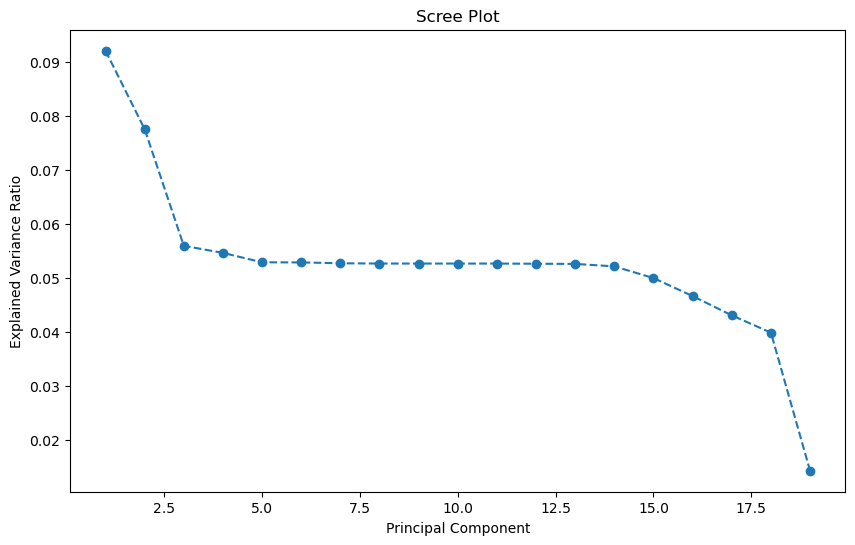

In [11]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/Scree_Plot.png')
plt.show()


In [12]:

# Display the amount of variance explained by each principal component
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance
})
print(explained_variance_df)

    Principal Component  Explained Variance Ratio
0                     1                  0.092020
1                     2                  0.077509
2                     3                  0.055917
3                     4                  0.054608
4                     5                  0.052863
5                     6                  0.052844
6                     7                  0.052685
7                     8                  0.052637
8                     9                  0.052632
9                    10                  0.052631
10                   11                  0.052629
11                   12                  0.052599
12                   13                  0.052566
13                   14                  0.052113
14                   15                  0.049946
15                   16                  0.046612
16                   17                  0.043048
17                   18                  0.039847
18                   19                  0.014294


In [13]:
# Get the top 3 contributors to each principal component
top_contributors = pd.DataFrame({
    f'PC{i+1}': loadings.iloc[:, i].abs().nlargest(3).index
    for i in range(loadings.shape[1])
})

# Display the top contributors for each principal component
for col in top_contributors.columns:
    print(f"{col}: {', '.join(top_contributors[col])}")

PC1: SHROUT, VOL, PERMCO
PC2: PERMCO, roa, PERMNO
PC3: RET, ptb, pe_exi
PC4: pe_exi, RET, HSICIG
PC5: PRC, SPREAD, bm
PC6: dpr, SHRCD, roe
PC7: SPREAD, roe, bm
PC8: roce, bm, evm
PC9: evm, npm, CAPEI
PC10: CAPEI, evm, npm
PC11: npm, CAPEI, evm
PC12: SPREAD, roe, bm
PC13: dpr, bm, roe
PC14: SHRCD, dpr, roe
PC15: HSICIG, pe_exi, PERMNO
PC16: ptb, RET, PERMNO
PC17: roa, pe_exi, PERMNO
PC18: PERMCO, PERMNO, roa
PC19: SHROUT, VOL, RET


In [14]:
# Define potential interpretations for each principal component
component_interpretations = {
    'PC1': 'Size and Volume-related factors, dominated by SHROUT and VOL.',
    'PC2': 'Market Capitalization and Return on Assets, heavily influenced by PERMCO and roa.',
    'PC3': 'Valuation and Price Momentum, driven by RET and ptb.',
    'PC4': 'Price and Equity Ratios, influenced by pe_exi and RET.',
    'PC5': 'Price and Spread, dominated by PRC and SPREAD.',
    # Add interpretations for the remaining PCs based on their top contributors
}

# Display the interpretations
for pc, interpretation in component_interpretations.items():
    print(f"{pc}: {interpretation}")

PC1: Size and Volume-related factors, dominated by SHROUT and VOL.
PC2: Market Capitalization and Return on Assets, heavily influenced by PERMCO and roa.
PC3: Valuation and Price Momentum, driven by RET and ptb.
PC4: Price and Equity Ratios, influenced by pe_exi and RET.
PC5: Price and Spread, dominated by PRC and SPREAD.


In [22]:
# Load the S&P 500 data
sp500_data = pd.read_csv('/Users/rohanpadaya/Downloads/S&P 500 Historical Data.csv')

# Display the first few rows to ensure it loaded correctly
print(sp500_data.head())

         Date     Price      Open      High       Low  Vol. Change %
0  12/01/2022  3,839.50  4,087.14  4,100.96  3,764.49   NaN   -5.90%
1  11/01/2022  4,080.11  3,901.79  4,080.11  3,698.15   NaN    5.38%
2  10/01/2022  3,871.98  3,609.78  3,905.42  3,491.58   NaN    7.99%
3  09/01/2022  3,585.62  3,936.73  4,119.28  3,584.13   NaN   -9.34%
4  08/01/2022  3,955.00  4,112.38  4,325.28  3,954.53   NaN   -4.24%


In [23]:
# Convert the 'Date' column to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], format='%m/%d/%Y')

# Sort the data by date in ascending order
sp500_data.sort_values(by='Date', inplace=True)

# Rename the 'Date' column to 'date' to match with the existing dataset
sp500_data.rename(columns={'Date': 'date'}, inplace=True)

# Remove commas from 'Price' column and convert it to a numeric type
sp500_data['Price'] = sp500_data['Price'].str.replace(',', '').astype(float)

# Calculate the percentage change in 'Price' column to get returns
sp500_data['SP500_RET'] = sp500_data['Price'].pct_change()

# Drop the first row as it will have NaN for returns
sp500_data.dropna(subset=['SP500_RET'], inplace=True)

# Display the processed data
print(sp500_data.head())

          date   Price      Open      High       Low  Vol. Change %  SP500_RET
154 2010-02-01  1104.5  1,073.90  1,112.40  1,044.50   NaN    2.85%   0.028494
153 2010-03-01  1169.4  1,105.40  1,180.70  1,105.40   NaN    5.88%   0.058760
152 2010-04-01  1186.7  1,171.20  1,219.80  1,170.70   NaN    1.48%   0.014794
151 2010-05-01  1089.4  1,188.60  1,205.10  1,040.80   NaN   -8.20%  -0.081992
150 2010-06-01  1030.7  1,087.30  1,131.20  1,028.30   NaN   -5.39%  -0.053883


In [25]:
final_merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393634 entries, 0 to 393633
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PERMNO    393634 non-null  int64         
 1   date      393634 non-null  datetime64[ns]
 2   SHRCD     393634 non-null  float64       
 3   PERMCO    393634 non-null  int64         
 4   HSICIG    393634 non-null  float64       
 5   PRC       393634 non-null  float64       
 6   VOL       393634 non-null  float64       
 7   RET       393634 non-null  float64       
 8   SHROUT    393634 non-null  float64       
 9   SPREAD    393634 non-null  float64       
 10  CAPEI     393634 non-null  float64       
 11  bm        393634 non-null  float64       
 12  evm       393634 non-null  float64       
 13  pe_exi    393634 non-null  float64       
 14  dpr       393634 non-null  float64       
 15  npm       393634 non-null  float64       
 16  roa       393634 non-null  float64    

In [27]:
# Step 1: Convert both date columns to datetime format if not already done
final_merged_data_cleaned['date'] = pd.to_datetime(final_merged_data_cleaned['date'])
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

# Step 2: Print unique dates from both datasets
print("Unique dates in final_merged_data_cleaned:")
print(final_merged_data_cleaned['date'].unique()[:10])  # Display the first 10 unique dates

print("Unique dates in sp500_data:")
print(sp500_data['date'].unique()[:10])  # Display the first 10 unique dates

# Step 3: Check if there are any common dates between the two datasets
common_dates = set(final_merged_data_cleaned['date']).intersection(set(sp500_data['date']))
print(f"Number of common dates: {len(common_dates)}")
print(f"Common dates: {sorted(list(common_dates))[:10]}")  # Show first 10 common dates

# Step 4: Adjust date ranges if necessary
# For example, if sp500_data dates are monthly and start at the beginning of the month,
# you might need to shift dates in final_merged_data_cleaned to the beginning of the month.

Unique dates in final_merged_data_cleaned:
<DatetimeArray>
['2010-03-31 00:00:00', '2010-04-30 00:00:00', '2010-06-30 00:00:00',
 '2010-08-31 00:00:00', '2010-09-30 00:00:00', '2010-11-30 00:00:00',
 '2010-12-31 00:00:00', '2011-01-31 00:00:00', '2011-02-28 00:00:00',
 '2011-03-31 00:00:00']
Length: 10, dtype: datetime64[ns]
Unique dates in sp500_data:
<DatetimeArray>
['2010-02-01 00:00:00', '2010-03-01 00:00:00', '2010-04-01 00:00:00',
 '2010-05-01 00:00:00', '2010-06-01 00:00:00', '2010-07-01 00:00:00',
 '2010-08-01 00:00:00', '2010-09-01 00:00:00', '2010-10-01 00:00:00',
 '2010-11-01 00:00:00']
Length: 10, dtype: datetime64[ns]
Number of common dates: 0
Common dates: []


In [28]:
# Shift the dates in sp500_data to the end of the month
sp500_data['date'] = sp500_data['date'] + pd.offsets.MonthEnd(0)

# Check the updated dates
print(sp500_data['date'].unique())

# Then, perform the merge again
final_merged_data_with_sp500 = pd.merge(final_merged_data_cleaned, sp500_data[['date', 'SP500_RET']], on='date', how='inner')

# Check the result
print(final_merged_data_with_sp500.info())
print(final_merged_data_with_sp500.head())

<DatetimeArray>
['2010-02-28 00:00:00', '2010-03-31 00:00:00', '2010-04-30 00:00:00',
 '2010-05-31 00:00:00', '2010-06-30 00:00:00', '2010-07-31 00:00:00',
 '2010-08-31 00:00:00', '2010-09-30 00:00:00', '2010-10-31 00:00:00',
 '2010-11-30 00:00:00',
 ...
 '2022-03-31 00:00:00', '2022-04-30 00:00:00', '2022-05-31 00:00:00',
 '2022-06-30 00:00:00', '2022-07-31 00:00:00', '2022-08-31 00:00:00',
 '2022-09-30 00:00:00', '2022-10-31 00:00:00', '2022-11-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 155, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393634 entries, 0 to 393633
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   PERMNO     393634 non-null  int64         
 1   date       393634 non-null  datetime64[ns]
 2   SHRCD      393634 non-null  float64       
 3   PERMCO     393634 non-null  int64         
 4   HSICIG     393634 non-null  float64       
 5   PRC        393634 non-nu

In [29]:
# Calculate the correlation between S&P 500 returns and the principal components
correlation_matrix = final_merged_data_with_sp500.corr()

# Display the correlation of S&P 500 returns with the principal components
sp500_correlations = correlation_matrix['SP500_RET'].sort_values(ascending=False)
print(sp500_correlations)

SP500_RET    1.000000
RET          0.300355
ptb          0.022589
PERMNO       0.008616
pe_exi       0.007773
SPREAD       0.002516
bm           0.002082
SHRCD        0.001914
npm          0.001345
evm          0.000761
dpr          0.000600
CAPEI        0.000553
PRC          0.000416
HSICIG      -0.000294
roe         -0.000406
SHROUT      -0.000416
roce        -0.000616
roa         -0.001109
VOL         -0.004513
PERMCO      -0.009236
date        -0.017823
divyield          NaN
Name: SP500_RET, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Include the first 5 principal components in the regression
pca_scores = pca.transform(scaled_data_df.drop(columns=['divyield']))
pca_scores_df = pd.DataFrame(pca_scores[:, :5], columns=[f'PC{i+1}' for i in range(5)])

# Add SP500_RET from the merged data
pca_scores_df['SP500_RET'] = final_merged_data_with_sp500['SP500_RET']

# Include RET as well
pca_scores_df['RET'] = final_merged_data_with_sp500['RET']

# Define the independent variables (adding RET and the first 5 principal components)
X = sm.add_constant(pca_scores_df[['RET', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']])

# Define the dependent variable
y = pca_scores_df['SP500_RET']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the regression results for the training data
print("Training Data Regression Results:")
print(model.summary())



Training Data Regression Results:
                            OLS Regression Results                            
Dep. Variable:              SP500_RET   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5293.
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:39:48   Log-Likelihood:             5.5438e+05
No. Observations:              314907   AIC:                        -1.109e+06
Df Residuals:                  314900   BIC:                        -1.109e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Display the results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r_squared}")

Test MSE: 0.0017176787613150649
Test RMSE: 0.04144488824107341
Test MAE: 0.03139988934946282
Test R²: 0.09311358974657025


In [15]:
# Convert necessary columns to numeric
#industry_data['Market Cap'] = pd.to_numeric(industry_data['Market Cap'], errors='coerce')
#industry_data['Volume'] = pd.to_numeric(industry_data['Volume'], errors='coerce')
#industry_data['IPO Year'] = pd.to_numeric(industry_data['IPO Year'], errors='coerce')

# Print the cleaned DataFrame information
#print(industry_data.info())

In [16]:
# Check the date range in stock_data_part3
#print("Date range in stock_data_part3:")
#print(stock_data_part3['date'].min(), stock_data_part3['date'].max())

# Check the date range in fama_french_data_cleaned
#print("\nDate range in fama_french_data_cleaned:")
#print(fama_french_data_cleaned['date'].min(), fama_french_data_cleaned['date'].max())

In [17]:
# Check unique date formats in both datasets
#print("Unique dates in stock_data_part3:")
#print(stock_data_part3['date'].unique()[:10])

#print("\nUnique dates in fama_french_data_cleaned:")
#print(fama_french_filtered['date'].unique()[:10])

# Identify common dates between the two datasets
#common_dates = set(stock_data_part3['date']).intersection(set(fama_french_filtered['date']))
#print(f"\nNumber of common dates: {len(common_dates)}")
#print(f"Common dates: {list(common_dates)[:10]}")  # Display first 10 common dates if any